In [81]:
import psycopg2
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv("db_credentials.env")

conn = psycopg2.connect(
    user=os.getenv("DB_USER"),
    password=os.getenv("DB_PASSWORD"),
    host=os.getenv("DB_HOST"),
    port=os.getenv("DB_PORT"),
    dbname=os.getenv("DB_NAME")
)

df = pd.read_sql_query("SELECT * FROM electricity_meter;", conn)
conn.close()

df

/var/folders/39/mwlmj6614j1ck_p4g29fw8zc0000gn/T/ipykernel_72883/1850329838.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM electricity_meter;", conn)


,id,created_at,active_tariff,active_power_w,total_power_import_kwh,total_gas_m3
0,1,2025-04-11 11:30:24.164061+00:00,1,196,NaN,NaN
1,2,2025-04-11 11:31:33.349774+00:00,1,103,NaN,NaN
2,3,2025-04-11 11:32:55.929347+00:00,1,99,NaN,NaN
3,4,2025-04-11 11:40:54.900280+00:00,1,103,NaN,NaN
4,5,2025-04-11 12:59:15.113278+00:00,1,111,NaN,NaN
...,...,...,...,...,...,...
36381,36382,2025-08-22 06:42:33.947140+00:00,1,100,4635.847,1261.429
36382,36383,2025-08-22 06:47:34.466732+00:00,1,96,4635.855,1261.429
36383,36384,2025-08-22 06:52:33.981524+00:00,1,98,4635.863,1261.429
36384,36385,2025-08-22 06:57:34.021535+00:00,1,92,4635.871,1261.429


In [82]:
import pytz

# Step 1: Make sure it's timezone-aware
df["created_at"] = pd.to_datetime(df["created_at"], utc=True)

# Step 2: Convert to Belgium time (automatic handling of daylight saving)
belgium_tz = pytz.timezone("Europe/Brussels")
df["created_at_be"] = df["created_at"].dt.tz_convert(belgium_tz)

df

,id,created_at,active_tariff,active_power_w,total_power_import_kwh,total_gas_m3,created_at_be
0,1,2025-04-11 11:30:24.164061+00:00,1,196,NaN,NaN,2025-04-11 13:30:24.164061+02:00
1,2,2025-04-11 11:31:33.349774+00:00,1,103,NaN,NaN,2025-04-11 13:31:33.349774+02:00
2,3,2025-04-11 11:32:55.929347+00:00,1,99,NaN,NaN,2025-04-11 13:32:55.929347+02:00
3,4,2025-04-11 11:40:54.900280+00:00,1,103,NaN,NaN,2025-04-11 13:40:54.900280+02:00
4,5,2025-04-11 12:59:15.113278+00:00,1,111,NaN,NaN,2025-04-11 14:59:15.113278+02:00
...,...,...,...,...,...,...,...
36381,36382,2025-08-22 06:42:33.947140+00:00,1,100,4635.847,1261.429,2025-08-22 08:42:33.947140+02:00
36382,36383,2025-08-22 06:47:34.466732+00:00,1,96,4635.855,1261.429,2025-08-22 08:47:34.466732+02:00
36383,36384,2025-08-22 06:52:33.981524+00:00,1,98,4635.863,1261.429,2025-08-22 08:52:33.981524+02:00
36384,36385,2025-08-22 06:57:34.021535+00:00,1,92,4635.871,1261.429,2025-08-22 08:57:34.021535+02:00


In [83]:
df["date_be"] = df["created_at_be"].dt.date
df["time_be"] = df["created_at_be"].dt.time
df["hour_be"] = df["created_at_be"].dt.hour
df["minute_be"] = df["created_at_be"].dt.minute
df["day_of_week"] = df["created_at_be"].dt.day_name()  # e.g., "Monday"
df["day_of_month"] = df["created_at_be"].dt.day
df["month"] = df["created_at_be"].dt.month
df["month_name"] = df["created_at_be"].dt.month_name()
df["year"] = df["created_at_be"].dt.year
df["week_number"] = df["created_at_be"].dt.isocalendar().week  # ISO week n
df.drop(columns=["id"], inplace=True)
df

,created_at,active_tariff,active_power_w,total_power_import_kwh,total_gas_m3,created_at_be,date_be,time_be,hour_be,minute_be,day_of_week,day_of_month,month,month_name,year,week_number
0,2025-04-11 11:30:24.164061+00:00,1,196,NaN,NaN,2025-04-11 13:30:24.164061+02:00,2025-04-11,13:30:24.164061,13,30,Friday,11,4,April,2025,15
1,2025-04-11 11:31:33.349774+00:00,1,103,NaN,NaN,2025-04-11 13:31:33.349774+02:00,2025-04-11,13:31:33.349774,13,31,Friday,11,4,April,2025,15
2,2025-04-11 11:32:55.929347+00:00,1,99,NaN,NaN,2025-04-11 13:32:55.929347+02:00,2025-04-11,13:32:55.929347,13,32,Friday,11,4,April,2025,15
3,2025-04-11 11:40:54.900280+00:00,1,103,NaN,NaN,2025-04-11 13:40:54.900280+02:00,2025-04-11,13:40:54.900280,13,40,Friday,11,4,April,2025,15
4,2025-04-11 12:59:15.113278+00:00,1,111,NaN,NaN,2025-04-11 14:59:15.113278+02:00,2025-04-11,14:59:15.113278,14,59,Friday,11,4,April,2025,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36381,2025-08-22 06:42:33.947140+00:00,1,100,4635.847,1261.429,2025-08-22 08:42:33.947140+02:00,2025-08-22,08:42:33.947140,8,42,Friday,22,8,August,2025,34
36382,2025-08-22 06:47:34.466732+00:00,1,96,4635.855,1261.429,2025-08-22 08:47:34.466732+02:00,2025-08-22,08:47:34.466732,8,47,Friday,22,8,August,2025,34
36383,2025-08-22 06:52:33.981524+00:00,1,98,4635.863,1261.429,2025-08-22 08:52:33.981524+02:00,2025-08-22,08:52:33.981524,8,52,Friday,22,8,August,2025,34
36384,2025-08-22 06:57:34.021535+00:00,1,92,4635.871,1261.429,2025-08-22 08:57:34.021535+02:00,2025-08-22,08:57:34.021535,8,57,Friday,22,8,August,2025,34


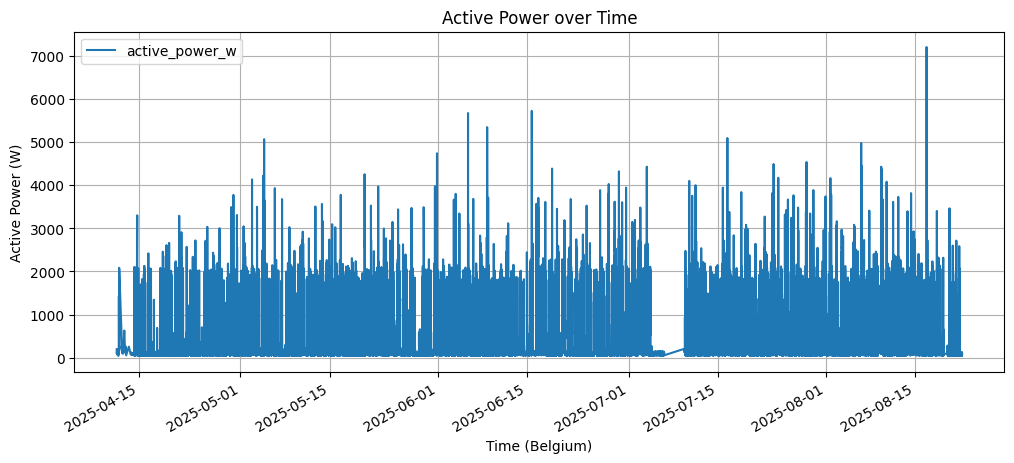

In [84]:
import matplotlib.pyplot as plt

# Optional: sort by time
df_sorted = df.sort_values("created_at_be")

# Plot
df_sorted.plot(
    x="created_at_be",
    y="active_power_w",
    kind="line",
    title="Active Power over Time",
    figsize=(12, 5)
)
plt.xlabel("Time (Belgium)")
plt.ylabel("Active Power (W)")
plt.grid(True)
#plt.tight_layout()
plt.show()

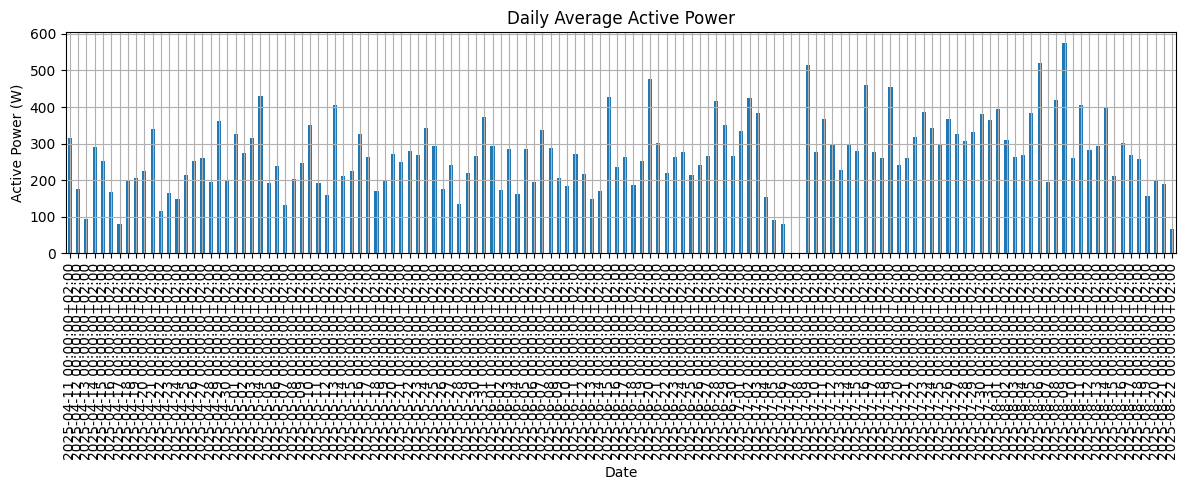

In [85]:
# Resample by day (or 'H' for hourly), and compute the mean power
df_daily = df_sorted.set_index("created_at_be").resample("D").mean(numeric_only=True)

# Plot as bar chart
df_daily.plot(
    y="active_power_w",
    kind="bar",
    title="Daily Average Active Power",
    figsize=(12, 5),
    legend=False
)
plt.xlabel("Date")
plt.ylabel("Active Power (W)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [86]:
df

,created_at,active_tariff,active_power_w,total_power_import_kwh,total_gas_m3,created_at_be,date_be,time_be,hour_be,minute_be,day_of_week,day_of_month,month,month_name,year,week_number
0,2025-04-11 11:30:24.164061+00:00,1,196,NaN,NaN,2025-04-11 13:30:24.164061+02:00,2025-04-11,13:30:24.164061,13,30,Friday,11,4,April,2025,15
1,2025-04-11 11:31:33.349774+00:00,1,103,NaN,NaN,2025-04-11 13:31:33.349774+02:00,2025-04-11,13:31:33.349774,13,31,Friday,11,4,April,2025,15
2,2025-04-11 11:32:55.929347+00:00,1,99,NaN,NaN,2025-04-11 13:32:55.929347+02:00,2025-04-11,13:32:55.929347,13,32,Friday,11,4,April,2025,15
3,2025-04-11 11:40:54.900280+00:00,1,103,NaN,NaN,2025-04-11 13:40:54.900280+02:00,2025-04-11,13:40:54.900280,13,40,Friday,11,4,April,2025,15
4,2025-04-11 12:59:15.113278+00:00,1,111,NaN,NaN,2025-04-11 14:59:15.113278+02:00,2025-04-11,14:59:15.113278,14,59,Friday,11,4,April,2025,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36381,2025-08-22 06:42:33.947140+00:00,1,100,4635.847,1261.429,2025-08-22 08:42:33.947140+02:00,2025-08-22,08:42:33.947140,8,42,Friday,22,8,August,2025,34
36382,2025-08-22 06:47:34.466732+00:00,1,96,4635.855,1261.429,2025-08-22 08:47:34.466732+02:00,2025-08-22,08:47:34.466732,8,47,Friday,22,8,August,2025,34
36383,2025-08-22 06:52:33.981524+00:00,1,98,4635.863,1261.429,2025-08-22 08:52:33.981524+02:00,2025-08-22,08:52:33.981524,8,52,Friday,22,8,August,2025,34
36384,2025-08-22 06:57:34.021535+00:00,1,92,4635.871,1261.429,2025-08-22 08:57:34.021535+02:00,2025-08-22,08:57:34.021535,8,57,Friday,22,8,August,2025,34


Text(0, 0.5, 'Average Active Power (W)')

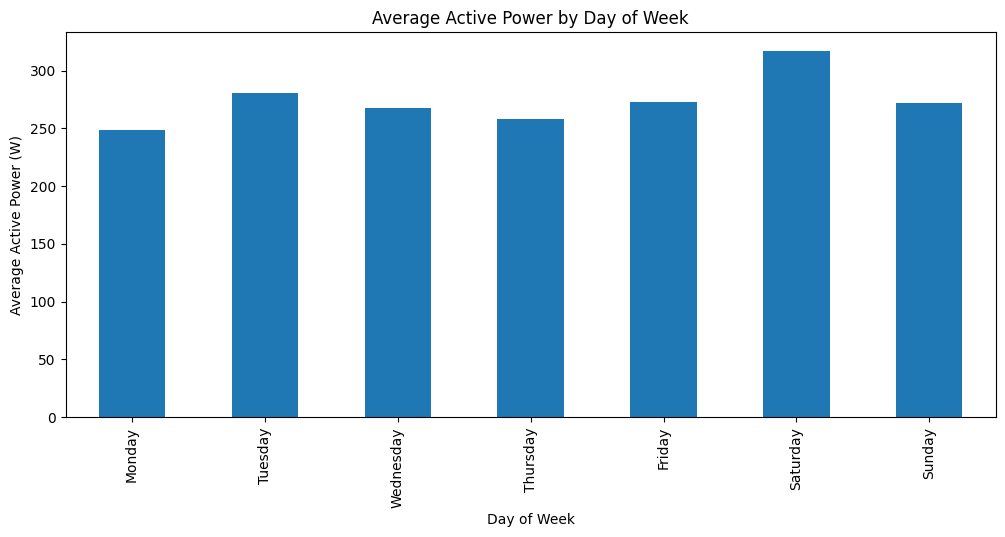

In [87]:
# Group by day_of_week and compute the average active_power_w
df_weekly_avg = df.groupby("day_of_week")["active_power_w"].mean().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
df_weekly_avg.plot(
    kind="bar",
    title="Average Active Power by Day of Week",
    figsize=(12, 5),
    legend=False
)
plt.xlabel("Day of Week")
plt.ylabel("Average Active Power (W)")

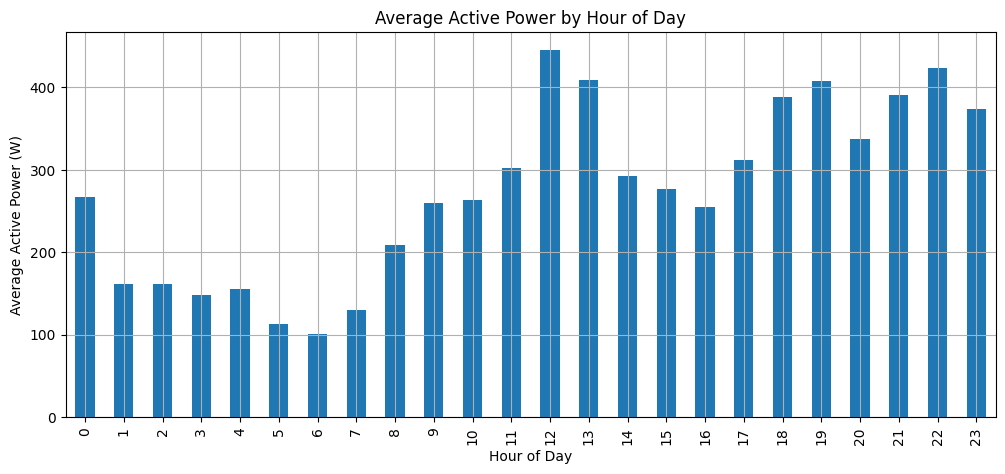

In [88]:
# Group by hour_be and compute the average active_power_w
df_hourly_avg = df.groupby("hour_be")["active_power_w"].mean()
df_hourly_avg.plot(
    kind="bar",
    title="Average Active Power by Hour of Day",
    figsize=(12, 5),
    legend=False
)
plt.xlabel("Hour of Day")
plt.ylabel("Average Active Power (W)")
plt.grid(True)

In [89]:
#convert to CSV
df.to_csv("electricity_meter_data.csv", index=False)

/var/folders/39/mwlmj6614j1ck_p4g29fw8zc0000gn/T/ipykernel_72883/2887221409.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


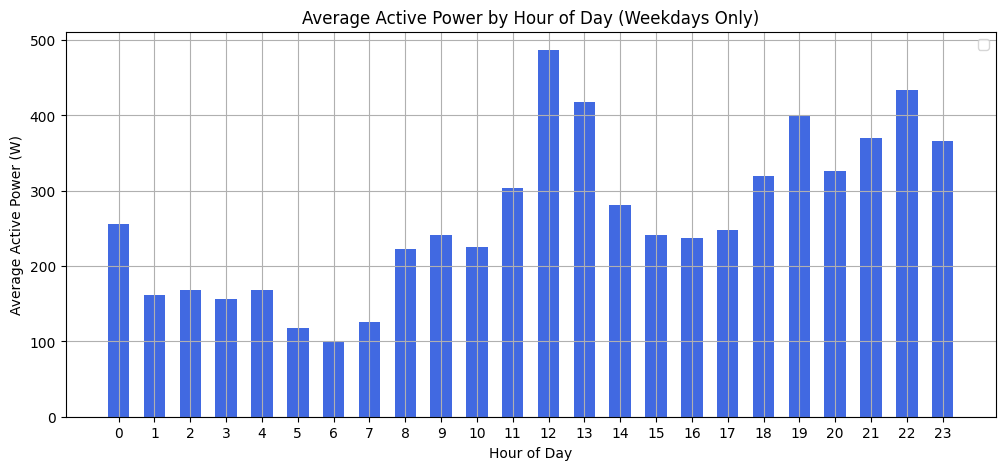

In [90]:
# To split weekdays and weekends
df_weekdays = df[df["day_of_week"].isin(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])]
df_weekends = df[df["day_of_week"].isin(["Saturday", "Sunday"])]

# Group by hour_be and compute the average active_power_w
df_weekdays_hourly_avg = df_weekdays.groupby("hour_be")["active_power_w"].mean()
df_weekends_hourly_avg = df_weekends.groupby("hour_be")["active_power_w"].mean()

# Plot
plt.figure(figsize=(12, 5))
plt.bar(df_weekdays_hourly_avg.index, df_weekdays_hourly_avg.values, width=0.6, color="royalblue")
plt.title("Average Active Power by Hour of Day (Weekdays Only)")
plt.xlabel("Hour of Day")
plt.ylabel("Average Active Power (W)")
plt.legend()
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

# df_hourly_avg = df.groupby("hour_be")["active_power_w"].mean()
# df_hourly_avg